<a href="https://colab.research.google.com/github/Daniel-de-Jesus/Especialization/blob/main/Statistics_SimpleLinearML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear Regressor

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df= pd.read_csv("Salary_Data.csv")
#df.head()
df.columns=["Experience", "Salary"]
#creating a dataframe of independent variable
X= df[['Experience']]
#dataframe of dependent variables
y= df["Salary"]


#we can convert the dataframe columns to a numpy array like
#It better suits to ML porposes

X_npy= X.values
y_npy= y.values

This is a important step in the statistical protocols usage to split the sample in test and train samples. It can be done throught the sklearn tool

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

In [21]:
#we may check the sets created
#train set
print(f'X_train.shape= {X_train.shape}')
print(f'y_train.shape= {y_train.shape}')
#test set
print(f'X_test.shape= {X_test.shape}')
print(f'y_test.shape= {y_test.shape}')

X_train.shape= (24, 1)
y_train.shape= (24,)
X_test.shape= (6, 1)
y_test.shape= (6,)


##Finaly, training the Simple Linear Regression Model

In [23]:
from sklearn.linear_model import LinearRegression

#creating the object

reg = LinearRegression()

In [24]:
#training with training set
reg.fit(X_train, y_train)

LinearRegression()

we can extract from the reg the linear coeficiente or intercep and, the slope.

reg.intercept_ $→$ linear coeficient

reg.coef_ $→$ slope

In [25]:
reg.coef_

array([9423.81532303])

In [26]:
reg.intercept_

25321.583011776813

We now can write the model of linear regression of data as:
$h(x) = reg*intercept_ + reg.coef_*x$

Coefficient of determination (R²) of the linear model estimated with the Training Set
The coefficient of determination (R²) is a summary measure that tells you how well the regression line fits the data.
The coefficient of determination (R²) measures how well a statistical model predicts an outcome. The outcome is represented by the model’s dependent variable.
It is a value (generally) between 0 and 1.

It represents the proportion of total variability of the -value that is accounted for by the independent variable .

Eg R² = 0.8234 means that the linear model explains 82.34% of the variance of the dependent variable from the regressors (independent variables) included in that linear model.

Broadly speaking:

Coefficient of determination (R²)	Interpretation
0	The model does not predict the outcome.
Between 0 and 1	The model partially predicts the outcome.
1	The model perfectly predicts the outcome.


In [27]:
print(f'R² = {reg.score(X_train, y_train)}')

R² = 0.9645401573418146


Salary Prediction

In [30]:
y_pred = reg.predict(X_test)
#numpy array like
y_pred

array([115790.21011287,  71498.27809463, 102596.86866063,  75267.80422384,
        55477.79204548,  60189.69970699])

In [31]:
results = pd.DataFrame({
    'Experience (Years)': X_test['Experience'],
    'Salary (Prediction)': y_pred.round(2),
    'Salary (True)': y_test.round(2),
    'Erro (Residual)': (y_test - y_pred).round(2),
    'Erro (Absolute)': abs(y_test - y_pred).round(2),
})

results

,Experience (Years),Salary (Prediction),Salary (True),Erro (Residual),Erro (Absolute)
27,9.6,115790.21,112635.0,-3155.21,3155.21
15,4.9,71498.28,67938.0,-3560.28,3560.28
23,8.2,102596.87,113812.0,11215.13,11215.13
17,5.3,75267.80,83088.0,7820.20,7820.20
8,3.2,55477.79,64445.0,8967.21,8967.21
9,3.7,60189.70,57189.0,-3000.70,3000.70


Creating the set in same interval of the  problem's set

In [32]:
regression_line_x = X['Experience']
#regression from all data with the model
regression_line_y = reg.predict(X)

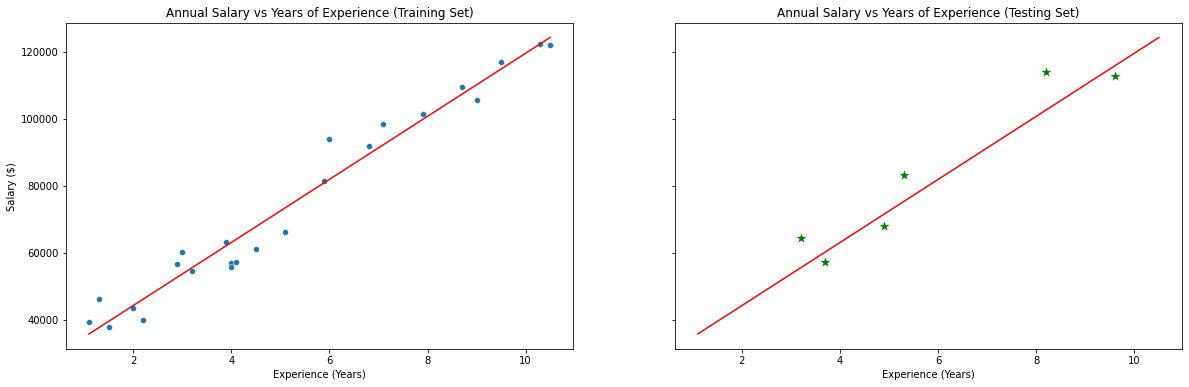

In [33]:
fig, axs = plt.subplots(1, 2, figsize=(20, 6), sharex=True, sharey=True)

regression_line_x = X['Experience']
regression_line_y = reg.predict(X)

sns.scatterplot(x=X_train['Experience'], y=y_train, ax=axs[0])
sns.lineplot(x=regression_line_x, y=regression_line_y, color="red", ax=axs[0])
axs[0].set_title('Annual Salary vs Years of Experience (Training Set)')
axs[0].set_xlabel('Experience (Years)')
axs[0].set_ylabel('Salary ($)')

sns.scatterplot(x=X_test['Experience'], y=y_test, color="green", marker='*', s=200, ax=axs[1])
sns.lineplot(x=regression_line_x, y=regression_line_y, color="red", ax=axs[1])
axs[1].set_title('Annual Salary vs Years of Experience (Testing Set)')
axs[1].set_xlabel('Experience (Years)')
axs[1].set_ylabel('Salary ($)')

display()

In [ ]:
#creates a copy of train dataframe
X_labeled = X.copy()

#creates a column named label with all values = Train
X_labeled['Label'] = 'Train'

#set the entrances whose the idex are equal of x test index iqual Test
X_labeled.loc[X_test.index, 'Label'] = 'Test'
X_labeled

Text(0, 0.5, 'Salary ($)')

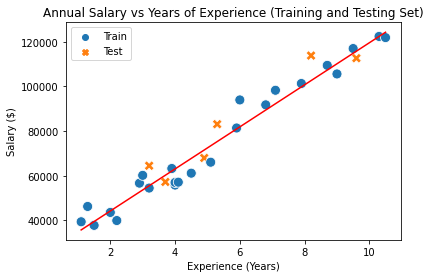

In [35]:
sns.scatterplot(data=X_labeled, x='Experience', y=y, hue='Label', style='Label', s=100)
sns.lineplot(x=regression_line_x, y=regression_line_y, color="red")
plt.title('Annual Salary vs Years of Experience (Training and Testing Set)')
plt.xlabel('Experience (Years)')
plt.ylabel('Salary ($)')

Final statistical scores and indicators

Mean Absolute Error- MAE

Mean Squared Error- MSE

Root Mean Squared Error- RMSE

R2

In [39]:
#Mean Absolute Error- MAE
from sklearn.metrics import mean_absolute_error
# comparism between the generate curve and the experimental one
MAE=  mean_absolute_error(y_test, y_pred)

#Mean Squared Error- MSE
from sklearn.metrics import mean_squared_error
MSE= mean_squared_error(y_test, y_pred)

#Root Mean Squared Error- RMSE
RMSE_Manually= np.sqrt(MSE)
RMSE= mean_squared_error(y_test, y_pred, squared=False)

#R2
r2_score_reg= reg.score(X_test, y_test)
from sklearn.metrics import r2_score
r2_score_sk= r2_score(y_test, y_pred)


In [40]:
print(f'The mean absolute error= {MAE}')
print(f'The mean squared error= {MSE}')
print(f'The Root Mean Squared Error Manually= {RMSE_Manually}')
print(f'The Root Mean Squared Error from Sklearn tools= {RMSE}')
print(f'The r2 scrore from reg function= {r2_score_reg}')
print(f'The r2 scrore from Sklearn tools= {r2_score_sk}')

The mean absolute error= 6286.453830757749
The mean squared error= 49830096.85590839
The Root Mean Squared Error Manually= 7059.04362190151
The Root Mean Squared Error from Sklearn tools= 7059.04362190151
The r2 scrore from reg function= 0.9024461774180497
The r2 scrore from Sklearn tools= 0.9024461774180497
